A vers√£o da linguagem Python utilizada neste projeto √©: 3.11.5
Arquivo CSV 'dados_sorvete.csv' gerado com sucesso!
Numero de linhas, colunas do dataset: (730, 3)
Nome das colunas do dataset: Index(['Data', 'Temperatura', 'Vendas_Sorvete'], dtype='object')
Primeiras linhas do DataFrame:
         Data  Temperatura  Vendas_Sorvete
0  2022-01-01    32.483571       88.397080
1  2022-01-02    29.308678       66.651529
2  2022-01-03    33.238443       93.233477
3  2022-01-04    37.615149      104.562828
4  2022-01-05    28.829233       74.291944

√öltimas linhas do DataFrame:
           Data  Temperatura  Vendas_Sorvete
725  2023-12-27    29.080083       61.596603
726  2023-12-28    30.092170       79.227556
727  2023-12-29    31.737909       85.595335
728  2023-12-30    27.301202       67.954772
729  2023-12-31    26.108476       58.908289

S√©rie Temporal Multivariada:
            Temperatura  Vendas_Sorvete
Data                                   
2022-01-01    32.483571       88.397080
2

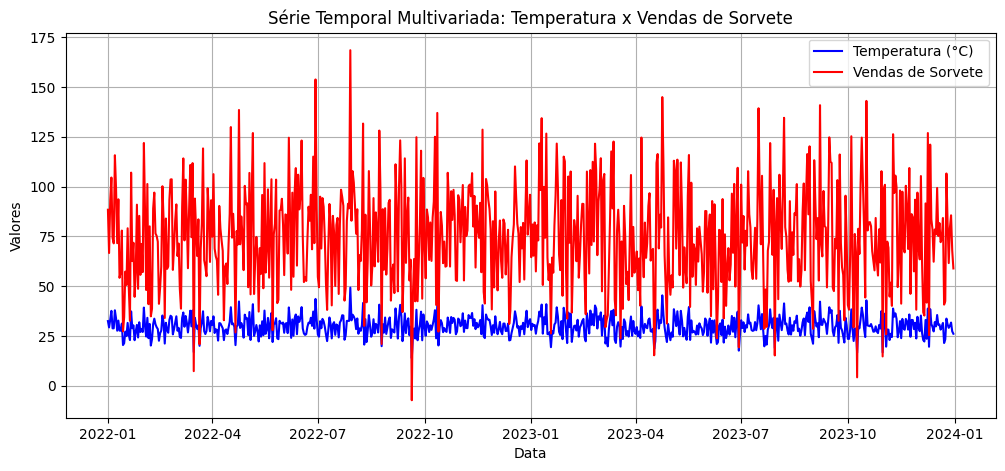

Teste ADF para Temperatura:
  - Estat√≠stica ADF: -27.695384210048772
  - p-valor: 0.0
  - Valores cr√≠ticos: {'1%': -3.4393520240470554, '5%': -2.8655128165959236, '10%': -2.5688855736949163}
  - Estacion√°ria? Sim

Teste ADF para Vendas_Sorvete:
  - Estat√≠stica ADF: -14.746396636726663
  - p-valor: 2.5242363718370828e-27
  - Valores cr√≠ticos: {'1%': -3.4393893552577723, '5%': -2.8655292671104644, '10%': -2.5688943376666744}
  - Estacion√°ria? Sim

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 08, Mar, 2025
Time:                     02:44:44
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    6.84869
Nobs:                     724.000    HQIC:                   6.76314
Log likelihood:          -4461.42    FPE:                    820.060
AIC:                      6.70937    Det(Omega_mle):         795.697
------------------------

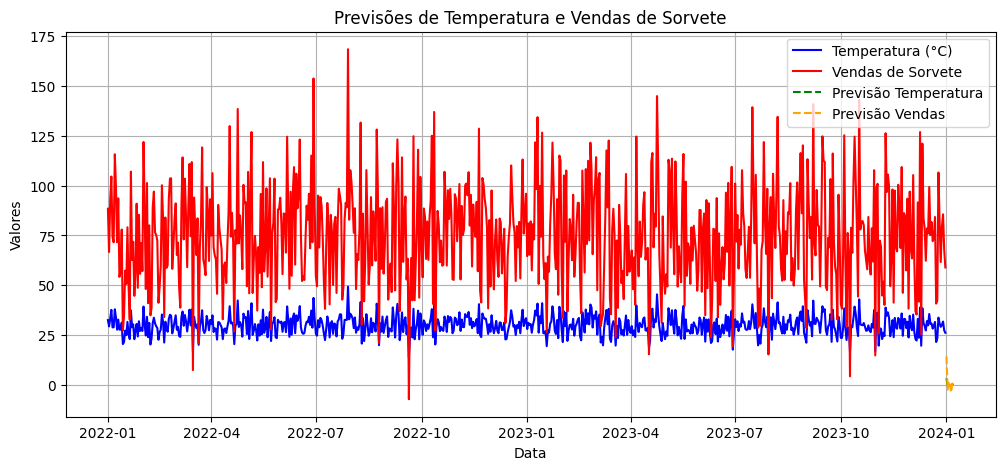

Erro Quadr√°tico M√©dio (RMSE) para as previs√µes de vendas de sorvete: 76.84


In [91]:
# Importa√ß√µes essenciais
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.vector_ar.var_model import VAR
from statsmodels.tsa.stattools import adfuller
from platform import python_version

# Mostrar a vers√£o do Python
print("A vers√£o da linguagem Python utilizada neste projeto √©:", python_version())

# Gerando dados sint√©ticos e criando DataFrame
# üîπ Definir per√≠odo de 2 anos (730 dias)
date_rng = pd.date_range(start='2022-01-01', end='2023-12-31', freq='D')

# üîπ Gerar dados sint√©ticos
np.random.seed(42)
temperatura = np.random.normal(30, 5, len(date_rng))  # Temperatura m√©dia di√°ria (¬∞C)
vendas_sorvete = 50 + (temperatura - 25) * 5 + np.random.normal(0, 5, len(date_rng))  # Vendas dependentes da temperatura

# Criar DataFrame
df = pd.DataFrame({'Data': date_rng, 'Temperatura': temperatura, 'Vendas_Sorvete': vendas_sorvete})

# üîπ Salvar em CSV
df.to_csv("dados_sorvete.csv", index=False)

print("Arquivo CSV 'dados_sorvete.csv' gerado com sucesso!")

# 1. Carregar os dados do CSV
file_path = "dados_sorvete.csv"
df = pd.read_csv(file_path)

# Exibir n√∫mero de linhas e colunas
print(f"Numero de linhas, colunas do dataset: {df.shape}")
print(f"Nome das colunas do dataset: {df.columns}")

# Remover espa√ßos extras nos nomes das colunas
df.columns = df.columns.str.strip()

# Exibir as primeiras e √∫ltimas linhas do dataset
print("Primeiras linhas do DataFrame:")
print(df.head())
print("\n√öltimas linhas do DataFrame:")
print(df.tail())

# 2. Converter 'Data' para datetime e definir como √≠ndice
df['Data'] = pd.to_datetime(df['Data'])
df.set_index('Data', inplace=True)

# 3. Criar s√©rie temporal multivariada
serie_temporal = df[['Temperatura', 'Vendas_Sorvete']]

# Garantir que o √≠ndice seja do tipo datetime
serie_temporal.index = pd.to_datetime(serie_temporal.index)

# 4. Garantir que a s√©rie tenha frequ√™ncia di√°ria e preencher valores ausentes
serie_temporal = serie_temporal.asfreq('D').fillna(method='ffill')

# Exibir os primeiros registros
print("\nS√©rie Temporal Multivariada:")
print(serie_temporal.head())

# 5. Visualiza√ß√£o das S√©ries Temporais
plt.figure(figsize=(12, 5))
plt.plot(serie_temporal.index, serie_temporal['Temperatura'], label="Temperatura (¬∞C)", color="blue")
plt.plot(serie_temporal.index, serie_temporal['Vendas_Sorvete'], label="Vendas de Sorvete", color="red")
plt.legend()
plt.title("S√©rie Temporal Multivariada: Temperatura x Vendas de Sorvete")
plt.xlabel("Data")
plt.ylabel("Valores")
plt.grid()
plt.show()

# 6. Teste de Estacionariedade (Dickey-Fuller)
def testar_estacionariedade(serie):
    resultado = adfuller(serie)
    print(f"Teste ADF para {serie.name}:")
    print(f"  - Estat√≠stica ADF: {resultado[0]}")
    print(f"  - p-valor: {resultado[1]}")
    print(f"  - Valores cr√≠ticos: {resultado[4]}")
    print(f"  - Estacion√°ria? {'Sim' if resultado[1] < 0.05 else 'N√£o'}\n")

testar_estacionariedade(serie_temporal['Temperatura'])
testar_estacionariedade(serie_temporal['Vendas_Sorvete'])

# 7. Diferencia√ß√£o para tornar os dados estacion√°rios, se necess√°rio
serie_temporal_diff = serie_temporal.diff().dropna()

# 8. Ajustar o modelo VAR
modelo = VAR(serie_temporal_diff)
ordem_modelo = 5  # Ordem do modelo VAR (ajust√°vel)
modelo_ajustado = modelo.fit(ordem_modelo)

# Exibir o resumo do modelo ajustado
print(modelo_ajustado.summary())

# 9. Previs√£o para os pr√≥ximos 7 dias
previsao = modelo_ajustado.forecast(serie_temporal_diff.values[-ordem_modelo:], steps=7)

# Gerar datas futuras para a previs√£o
ult_data = serie_temporal_diff.index[-1]
datas_futuras = pd.date_range(ult_data, periods=8, freq='D')[1:]  # Pr√≥ximos 7 dias

# Criar um DataFrame com as previs√µes
df_previsao = pd.DataFrame(previsao, index=datas_futuras, columns=serie_temporal_diff.columns)

# Exibir a tabela com as previs√µes
print("\nTabela com as previs√µes para os pr√≥ximos 7 dias:")
print(df_previsao)

# 10. Visualiza√ß√£o das Previs√µes
plt.figure(figsize=(12, 5))
plt.plot(serie_temporal.index, serie_temporal['Temperatura'], label="Temperatura (¬∞C)", color="blue")
plt.plot(serie_temporal.index, serie_temporal['Vendas_Sorvete'], label="Vendas de Sorvete", color="red")
plt.plot(df_previsao.index, df_previsao['Temperatura'], label="Previs√£o Temperatura", color="green", linestyle='--')
plt.plot(df_previsao.index, df_previsao['Vendas_Sorvete'], label="Previs√£o Vendas", color="orange", linestyle='--')
plt.legend()
plt.title("Previs√µes de Temperatura e Vendas de Sorvete")
plt.xlabel("Data")
plt.ylabel("Valores")
plt.grid()
plt.show()

# 11. Avalia√ß√£o das previs√µes (RMSE como exemplo)
from sklearn.metrics import mean_squared_error
import math

# Calculando o erro quadr√°tico m√©dio (RMSE) para avalia√ß√£o
y_true = serie_temporal['Vendas_Sorvete'].iloc[-7:]
y_pred = df_previsao['Vendas_Sorvete']
rmse = math.sqrt(mean_squared_error(y_true, y_pred))
print(f"Erro Quadr√°tico M√©dio (RMSE) para as previs√µes de vendas de sorvete: {rmse:.2f}")


A vers√£o da linguagem Python utilizada neste projeto √©: 3.11.5


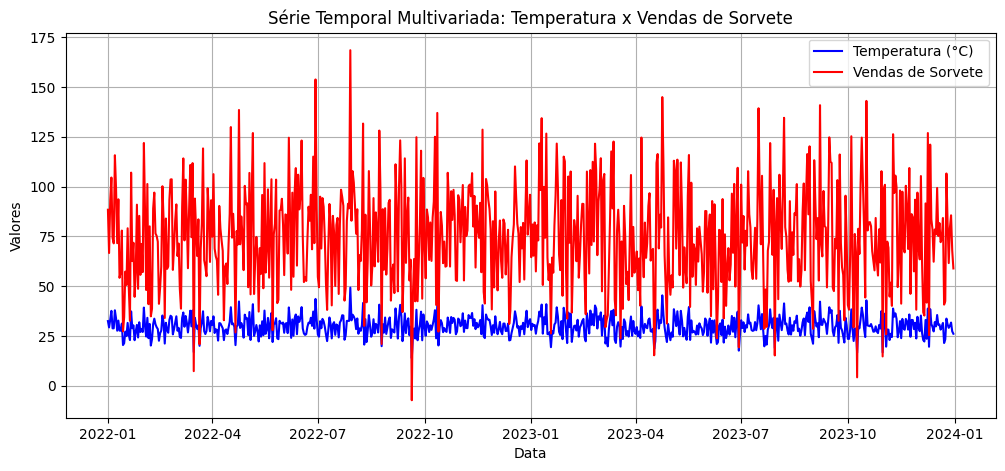

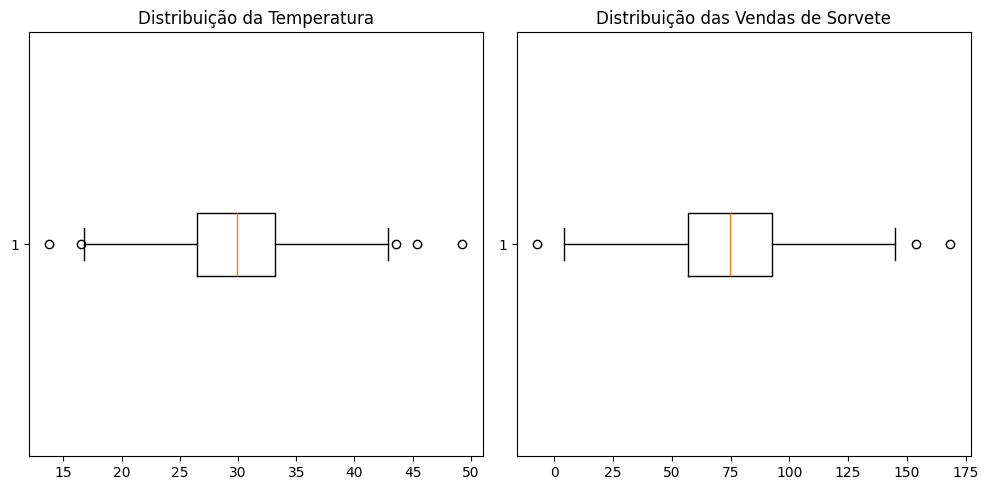

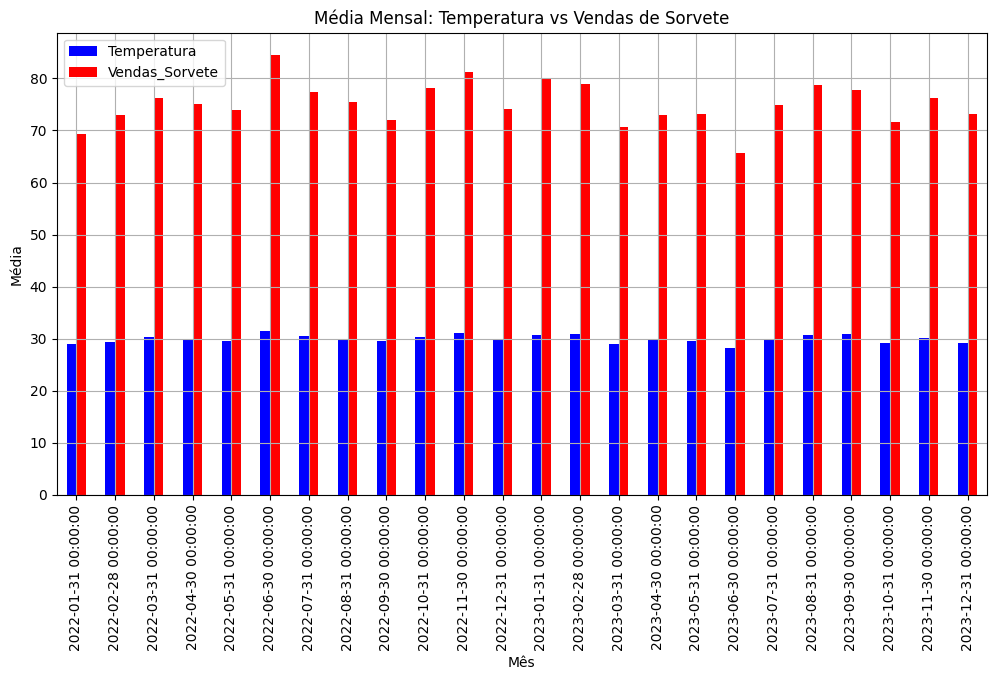

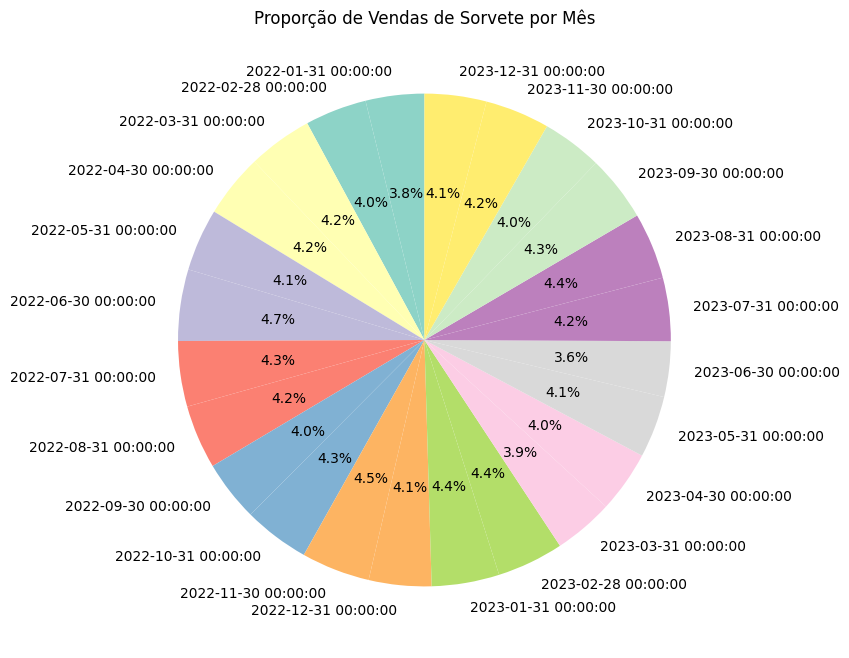

Teste ADF para Temperatura:
  - Estat√≠stica ADF: -27.695384210048772
  - p-valor: 0.0
  - Valores cr√≠ticos: {'1%': -3.4393520240470554, '5%': -2.8655128165959236, '10%': -2.5688855736949163}
  - Estacion√°ria? Sim

Teste ADF para Vendas_Sorvete:
  - Estat√≠stica ADF: -14.746396636726658
  - p-valor: 2.5242363718371197e-27
  - Valores cr√≠ticos: {'1%': -3.4393893552577723, '5%': -2.8655292671104644, '10%': -2.5688943376666744}
  - Estacion√°ria? Sim

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 08, Mar, 2025
Time:                     02:45:31
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    6.84869
Nobs:                     724.000    HQIC:                   6.76314
Log likelihood:          -4461.42    FPE:                    820.060
AIC:                      6.70937    Det(Omega_mle):         795.697
------------------------

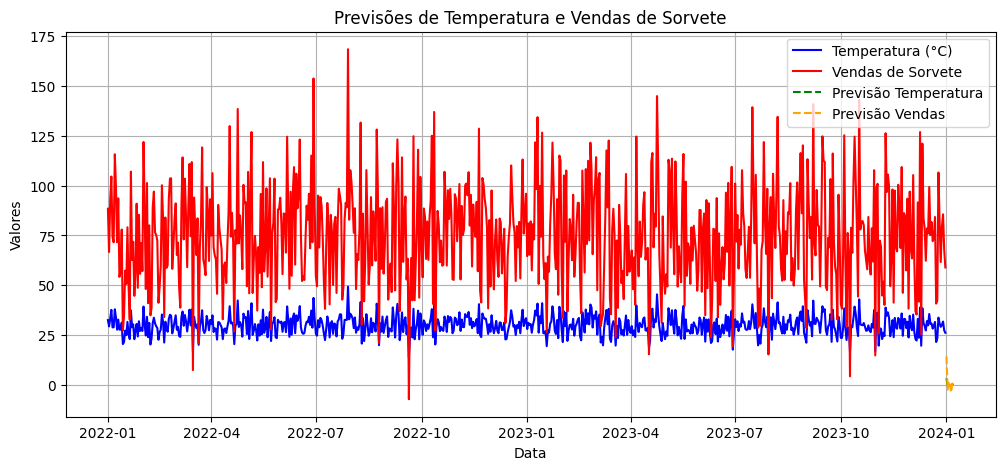

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.vector_ar.var_model import VAR
from statsmodels.tsa.stattools import adfuller
from platform import python_version

# Mostrar a vers√£o do Python
print("A vers√£o da linguagem Python utilizada neste projeto √©:", python_version())

# Gerando dados sint√©ticos e criando DataFrame
date_rng = pd.date_range(start='2022-01-01', end='2023-12-31', freq='D')
np.random.seed(42)
temperatura = np.random.normal(30, 5, len(date_rng))  # Temperatura m√©dia di√°ria (¬∞C)
vendas_sorvete = 50 + (temperatura - 25) * 5 + np.random.normal(0, 5, len(date_rng))  # Vendas dependentes da temperatura

# Criar DataFrame
df = pd.DataFrame({'Data': date_rng, 'Temperatura': temperatura, 'Vendas_Sorvete': vendas_sorvete})

# 1. Converter 'Data' para datetime e definir como √≠ndice
df['Data'] = pd.to_datetime(df['Data'])
df.set_index('Data', inplace=True)

# 2. Garantir que a s√©rie tenha frequ√™ncia di√°ria e preencher valores ausentes
df = df.asfreq('D').fillna(method='ffill')

# 3. Visualiza√ß√£o das S√©ries Temporais
plt.figure(figsize=(12, 5))
plt.plot(df.index, df['Temperatura'], label="Temperatura (¬∞C)", color="blue")
plt.plot(df.index, df['Vendas_Sorvete'], label="Vendas de Sorvete", color="red")
plt.legend()
plt.title("S√©rie Temporal Multivariada: Temperatura x Vendas de Sorvete")
plt.xlabel("Data")
plt.ylabel("Valores")
plt.grid()
plt.show()

# **Boxplot** para identificar outliers e distribui√ß√µes das vari√°veis
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.boxplot(df['Temperatura'], vert=False)
plt.title("Distribui√ß√£o da Temperatura")

plt.subplot(1, 2, 2)
plt.boxplot(df['Vendas_Sorvete'], vert=False)
plt.title("Distribui√ß√£o das Vendas de Sorvete")

plt.tight_layout()
plt.show()

# **Gr√°fico de Colunas** - Comparando a Temperatura com as Vendas de Sorvete em um per√≠odo espec√≠fico
df_resampled = df.resample('M').mean()  # Resampling para m√©dia mensal
df_resampled[['Temperatura', 'Vendas_Sorvete']].plot(kind='bar', figsize=(12, 6), color=['blue', 'red'])
plt.title("M√©dia Mensal: Temperatura vs Vendas de Sorvete")
plt.xlabel("M√™s")
plt.ylabel("M√©dia")
plt.grid(True)
plt.show()

# **Gr√°fico de Pizza** - Propor√ß√£o de vendas de sorvete por m√™s
df_resampled['Vendas_Sorvete'].plot(kind='pie', figsize=(8, 8), autopct='%1.1f%%', startangle=90, colormap='Set3')
plt.title("Propor√ß√£o de Vendas de Sorvete por M√™s")
plt.ylabel("")  # Remover o r√≥tulo 'Vendas_Sorvete'
plt.show()

# 4. Teste de Estacionariedade (Dickey-Fuller)
def testar_estacionariedade(serie):
    resultado = adfuller(serie)
    print(f"Teste ADF para {serie.name}:")
    print(f"  - Estat√≠stica ADF: {resultado[0]}")
    print(f"  - p-valor: {resultado[1]}")
    print(f"  - Valores cr√≠ticos: {resultado[4]}")
    print(f"  - Estacion√°ria? {'Sim' if resultado[1] < 0.05 else 'N√£o'}\n")

testar_estacionariedade(df['Temperatura'])
testar_estacionariedade(df['Vendas_Sorvete'])

# 5. Diferencia√ß√£o para tornar os dados estacion√°rios, se necess√°rio
df_diff = df.diff().dropna()

# 6. Ajustar o modelo VAR
modelo = VAR(df_diff)
modelo_ajustado = modelo.fit(5)  # Ordem do modelo

# Exibir o resumo do modelo ajustado
print(modelo_ajustado.summary())

# 7. Previs√£o para os pr√≥ximos 7 dias
previsao = modelo_ajustado.forecast(df_diff.values[-5:], steps=7)

# Gerar datas futuras para a previs√£o
ult_data = df_diff.index[-1]
datas_futuras = pd.date_range(ult_data, periods=8, freq='D')[1:]  # Pr√≥ximos 7 dias

# Criar um DataFrame com as previs√µes
df_previsao = pd.DataFrame(previsao, index=datas_futuras, columns=df_diff.columns)

# Exibir a tabela com as previs√µes
print("\nTabela com as previs√µes para os pr√≥ximos 7 dias:")
print(df_previsao)

# 8. Visualiza√ß√£o das Previs√µes
plt.figure(figsize=(12, 5))
plt.plot(df.index, df['Temperatura'], label="Temperatura (¬∞C)", color="blue")
plt.plot(df.index, df['Vendas_Sorvete'], label="Vendas de Sorvete", color="red")
plt.plot(df_previsao.index, df_previsao['Temperatura'], label="Previs√£o Temperatura", color="green", linestyle='--')
plt.plot(df_previsao.index, df_previsao['Vendas_Sorvete'], label="Previs√£o Vendas", color="orange", linestyle='--')
plt.legend()
plt.title("Previs√µes de Temperatura e Vendas de Sorvete")
plt.xlabel("Data")
plt.ylabel("Valores")
plt.grid()
plt.show()

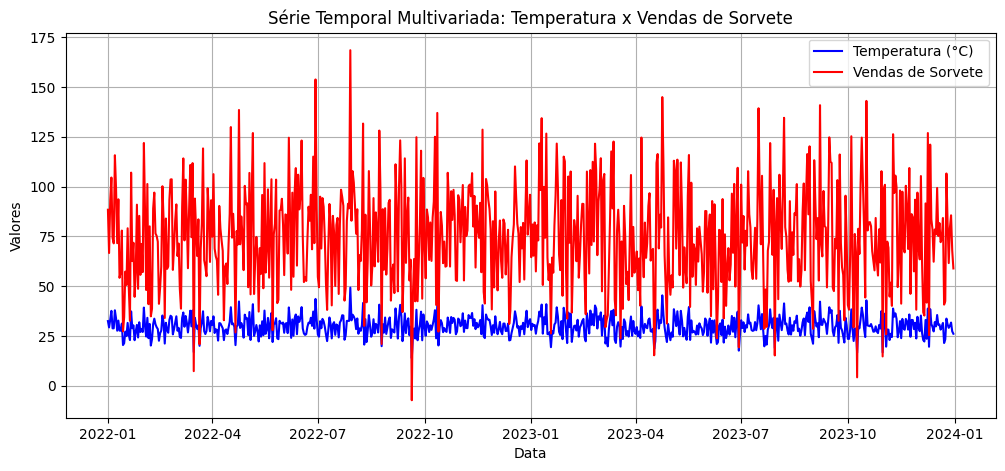


Tabela com as previs√µes para os pr√≥ximos 7 dias (Holt-Winters):
            Previsao_Vendas_Sorvete
2024-01-01                72.386614
2024-01-02                73.111143
2024-01-03                74.452032
2024-01-04                88.776544
2024-01-05                61.619517
2024-01-06                73.961735
2024-01-07                87.137545


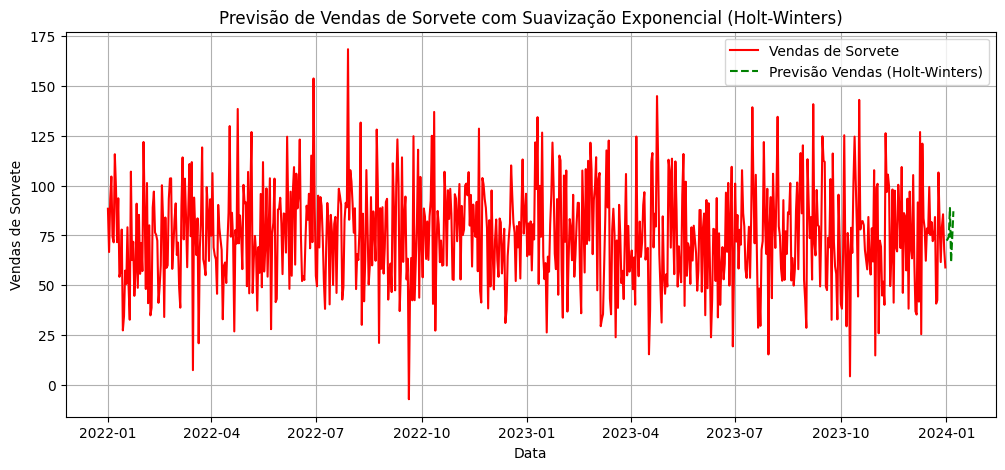

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# 1. Carregar os dados do CSV
df = pd.read_csv('dados_sorvete.csv')

# 2. Converter 'Data' para datetime e definir como √≠ndice
df['Data'] = pd.to_datetime(df['Data'])
df.set_index('Data', inplace=True)

# Garantir que a s√©rie tenha frequ√™ncia di√°ria e preencher valores ausentes
df = df.asfreq('D').fillna(method='ffill')

# 3. Visualizar as S√©ries Temporais
plt.figure(figsize=(12, 5))
plt.plot(df.index, df['Temperatura'], label="Temperatura (¬∞C)", color="blue")
plt.plot(df.index, df['Vendas_Sorvete'], label="Vendas de Sorvete", color="red")
plt.legend()
plt.title("S√©rie Temporal Multivariada: Temperatura x Vendas de Sorvete")
plt.xlabel("Data")
plt.ylabel("Valores")
plt.grid()
plt.show()

# 4. Aplicando a Suaviza√ß√£o Exponencial para Vendas de Sorvete

# Criar o modelo de suaviza√ß√£o exponencial (Holt-Winters)
modelo_hw = ExponentialSmoothing(df['Vendas_Sorvete'], trend='add', seasonal='add', seasonal_periods=365)
modelo_ajustado = modelo_hw.fit()

# Realizar a previs√£o para os pr√≥ximos 7 dias
previsao = modelo_ajustado.forecast(steps=7)

# Gerar datas futuras para a previs√£o
ult_data = df.index[-1]
datas_futuras = pd.date_range(ult_data, periods=8, freq='D')[1:]  # Pr√≥ximos 7 dias

# Criar DataFrame com as previs√µes
df_previsao_hw = pd.DataFrame(previsao, index=datas_futuras, columns=['Previsao_Vendas_Sorvete'])

# Exibir a tabela com as previs√µes
print("\nTabela com as previs√µes para os pr√≥ximos 7 dias (Holt-Winters):")
print(df_previsao_hw)

# 5. Visualizar as previs√µes
plt.figure(figsize=(12, 5))
plt.plot(df.index, df['Vendas_Sorvete'], label="Vendas de Sorvete", color="red")
plt.plot(df_previsao_hw.index, df_previsao_hw['Previsao_Vendas_Sorvete'], label="Previs√£o Vendas (Holt-Winters)", color="green", linestyle='--')
plt.legend()
plt.title("Previs√£o de Vendas de Sorvete com Suaviza√ß√£o Exponencial (Holt-Winters)")
plt.xlabel("Data")
plt.ylabel("Vendas de Sorvete")
plt.grid()
plt.show()



Tabela com as previs√µes para os pr√≥ximos 7 dias (Holt-Winters):
            Previsao_Vendas_Sorvete
2024-01-01                72.386614
2024-01-02                73.111143
2024-01-03                74.452032
2024-01-04                88.776544
2024-01-05                61.619517
2024-01-06                73.961735
2024-01-07                87.137545


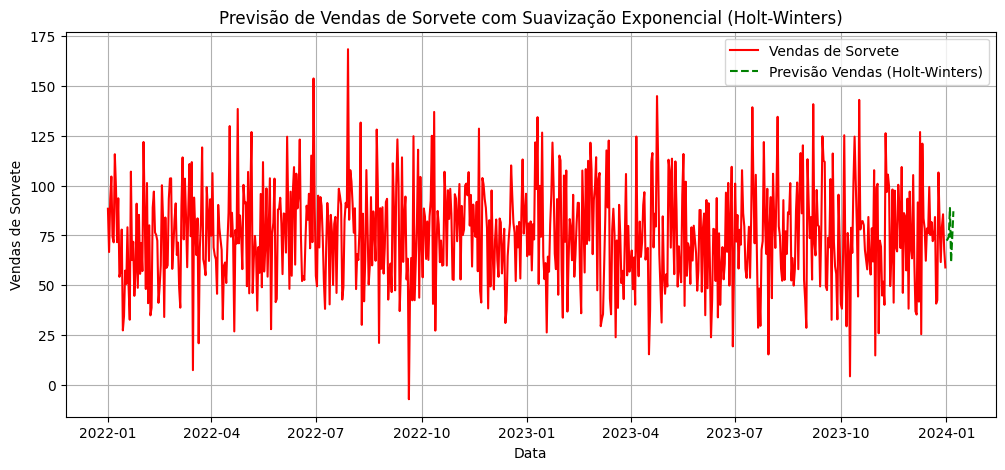

In [94]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Criar o modelo Holt-Winters para s√©ries com tend√™ncia e sazonalidade
modelo_hw = ExponentialSmoothing(df['Vendas_Sorvete'], 
                                  trend='add', 
                                  seasonal='add', 
                                  seasonal_periods=365)  # Sazonalidade anual para dados di√°rios
modelo_ajustado = modelo_hw.fit()

# Realizar a previs√£o para os pr√≥ximos 7 dias
previsao = modelo_ajustado.forecast(steps=7)

# Gerar datas futuras para a previs√£o
ult_data = df.index[-1]
datas_futuras = pd.date_range(ult_data, periods=8, freq='D')[1:]  # Pr√≥ximos 7 dias

# Criar DataFrame com as previs√µes
df_previsao_hw = pd.DataFrame(previsao, index=datas_futuras, columns=['Previsao_Vendas_Sorvete'])

# Exibir a tabela com as previs√µes
print("\nTabela com as previs√µes para os pr√≥ximos 7 dias (Holt-Winters):")
print(df_previsao_hw)

# Visualizar as previs√µes
plt.figure(figsize=(12, 5))
plt.plot(df.index, df['Vendas_Sorvete'], label="Vendas de Sorvete", color="red")
plt.plot(df_previsao_hw.index, df_previsao_hw['Previsao_Vendas_Sorvete'], label="Previs√£o Vendas (Holt-Winters)", color="green", linestyle='--')
plt.legend()
plt.title("Previs√£o de Vendas de Sorvete com Suaviza√ß√£o Exponencial (Holt-Winters)")
plt.xlabel("Data")
plt.ylabel("Vendas de Sorvete")
plt.grid()
plt.show()



Tabela com as previs√µes para os pr√≥ximos 7 dias (Holt-Winters):
            Previsao_Vendas_Sorvete
2024-01-01                72.386614
2024-01-02                73.111143
2024-01-03                74.452032
2024-01-04                88.776544
2024-01-05                61.619517
2024-01-06                73.961735
2024-01-07                87.137545
2024-01-08               108.963162
2024-01-09                83.563783
2024-01-10               113.665046
2024-01-11                47.679242
2024-01-12                77.722842
2024-01-13                70.839714
2024-01-14                81.030115
2024-01-15                46.782392
2024-01-16                49.198759
2024-01-17                51.075720
2024-01-18                41.752378
2024-01-19                51.979693
2024-01-20                40.520276
2024-01-21                84.650690
2024-01-22                75.207442
2024-01-23                94.129349
2024-01-24                69.867762
2024-01-25                54.3731

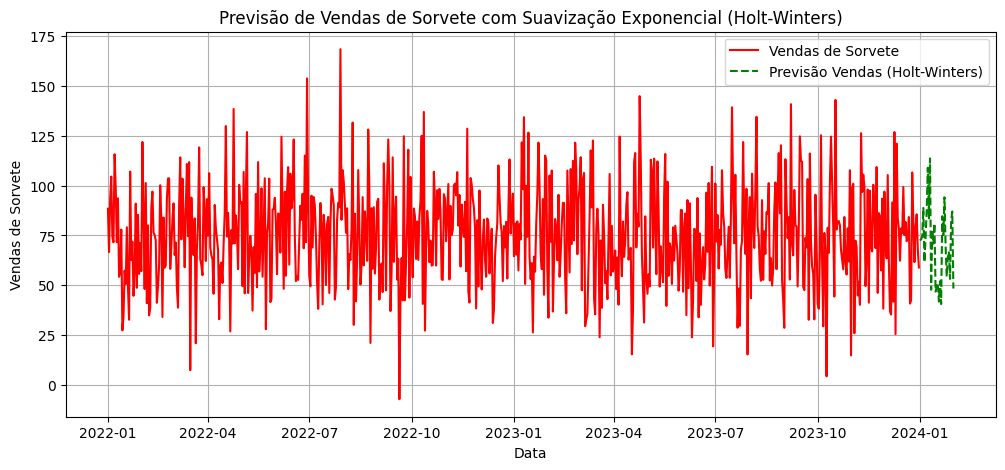

In [101]:
# Carregar o arquivo CSV
df = pd.read_csv('dados_sorvete.csv')

# Converter a coluna 'Data' para datetime e definir como √≠ndice
df['Data'] = pd.to_datetime(df['Data'])
df.set_index('Data', inplace=True)

# Garantir que a s√©rie temporal tenha a frequ√™ncia definida como di√°ria
df = df.asfreq('D')

# Criar o modelo Holt-Winters para suaviza√ß√£o exponencial
modelo_hw = ExponentialSmoothing(df['Vendas_Sorvete'], 
                                  trend='add',  # Ajuste de tend√™ncia
                                  seasonal='add',  # Ajuste de sazonalidade
                                  seasonal_periods=365)  # Sazonalidade anual para dados di√°rios

# Ajustar o modelo
modelo_ajustado = modelo_hw.fit()

# Fazer previs√µes para os pr√≥ximos 7 dias
previsao = modelo_ajustado.forecast(steps=31)

# Gerar as datas futuras para a previs√£o
ult_data = df.index[-1]
datas_futuras = pd.date_range(ult_data, periods=32, freq='D')[1:]  # Pr√≥ximos 7 dias

# Criar DataFrame com as previs√µes
df_previsao_hw = pd.DataFrame(previsao, index=datas_futuras, columns=['Previsao_Vendas_Sorvete'])

# Exibir a tabela com as previs√µes
print("\nTabela com as previs√µes para os pr√≥ximos 7 dias (Holt-Winters):")
print(df_previsao_hw)

# Visualizar a previs√£o junto aos dados originais
plt.figure(figsize=(12, 5))
plt.plot(df.index, df['Vendas_Sorvete'], label="Vendas de Sorvete", color="red")
plt.plot(df_previsao_hw.index, df_previsao_hw['Previsao_Vendas_Sorvete'], label="Previs√£o Vendas (Holt-Winters)", color="green", linestyle='--')
plt.legend()
plt.title("Previs√£o de Vendas de Sorvete com Suaviza√ß√£o Exponencial (Holt-Winters)")
plt.xlabel("Data")
plt.ylabel("Vendas de Sorvete")
plt.grid()
plt.show()
